
<h1> 15 - Le format Netcdf: La librairie Xarray</h1>



Dans ce tutoriel, nous utiliserons les fonctionnalités de la bibliothèque  Xarray pour traiter et analyser des produits au format Netcdf.



   

<img src = "./figures/xarray.png" alt = "xarray" width = "60%" height = "70%">


Xarray possède deux structures de données de base, qui s'appuient sur et étendent les forces de base de NumPy et  Pandas. Les deux structures de données sont fondamentalement N-dimensionnelles:

<b>1-  DataArray </b>

xarray.DataArray est l'implémentation par xarray d'un tableau multidimensionnel étiqueté. Il possède plusieurs propriétés clés:

<table border="1" class="docutils">
<colgroup>
<col width="27%">
<col width="57%">
</colgroup>
<tbody valign="top">
<tr><td><tt class="docutils literal"><span class="pre">values</span></tt></td>
<td> a numpy.ndarray holding the array’s values</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">dims</span></tt></td>
<td>dimension names for each axis (e.g., ('x', 'y', 'z','time'))</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">coords</span></tt></td>
<td>a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)</td>
</tr>
<tr><td><tt class="docutils literal"><span class="pre">attrs</span></tt></td>
<td>an OrderedDict to hold arbitrary metadata (attributes)</td>
</tr>
</tbody>
</table>


<b>2- DataSet </b>

xarray.Dataset est l'équivalent multidimensionnel d'un DataFrame. Il s'agit d'un conteneur de type dict de tableaux étiquetés (objets DataArray) avec des dimensions alignées. Il est conçu comme une représentation en mémoire du modèle de données du format de fichier netCDF.


xarray.DataSet est une collection de DataArrays. Chaque fichier NEtcdf contient un Dataset. 

<h2> 15.1 - Ouvrir un fichier Netcdf</h2>



Nous allons ouvrir et stocker les données d'un fichier Netcdf dans un ensemble de données.

Nous devons d'abord importer des bibliothèques et créer des alias.


In [2]:
import xarray as xr
import warnings; warnings.filterwarnings(action='ignore')
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

- Pour importer et stocker en tant que Dataset un seul fichier Netcdf:

Nous allons travailler ici avec les champs de température issus de la réanalyse globale de CERA20C. 

In [3]:
unique_dataDIR = './DATA/CERA20C/cera20c_member0_TAS_197101_day.nc'
TAS = xr.open_dataset(unique_dataDIR)
TAS

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-01-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Oct 25 14:29:40 2018: cdo daymean ./TAS/cera20c_member0...
    CDO:          Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/...

- Pour importer plusieurs fichier Netcdf: 


Ici, nous voulons stocker tous les noms de fichiers commençant par «cera20c_member0_TAS_» et situés dans le chemin «./data/cera20c/». 

In [4]:
multi_dataDIR = './DATA/CERA20C/cera20c_member0_TAS_*.nc'
TAS2 = xr.open_mfdataset(multi_dataDIR)
TAS2

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 365)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Oct 25 14:29:40 2018: cdo daymean ./TAS/cera20c_member0...
    CDO:          Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/...

- Combiner des fichiers Netcdf:

Pour combiner des variables et des coordonnées entre plusieurs objets DataArray et/ou Dataset, on utilise la méthode <b>.merge()</b>. Il peut fusionner une liste de Dataset, DataArray ou des dictionnaires d'objets convertibles en objets DataArray:

In [5]:
multi_dataDIR = './DATA/CERA20C/cera20c_member0_TAS_*.nc'
TAS2 = xr.open_mfdataset(multi_dataDIR)
multi_dataDIR2 = './DATA/CERA20C/cera20c_member0_SIC_*.nc'
SIC2 = xr.open_mfdataset(multi_dataDIR2)

DS_new = xr.merge([TAS2,SIC2])
DS_new

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 365)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 145, 288), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(31, 145, 288), meta=np.ndarray>

<h2> 15.2 - Explorer un jeu de données Netcdf</h2>


Nous pouvons rapidement explorer nos ensembles de données en utilisant certaines méthodes de la bibliothèque xarray:

    - DS.var
    - DS.dims
    - DS.coords
    - DS.attrs

In [6]:
DS_new.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 365)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 145, 288), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(31, 145, 288), meta=np.ndarray>>

In [7]:
DS_new.dims

Frozen(SortedKeysDict({'latitude': 145, 'longitude': 288, 'time': 365, 'bnds': 2}))

In [8]:
DS_new.coords

Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00


<h2> 15.3 - Opérations de base avec Xarray</h2>

<h3> 15.3.1 - Sélectionner une date:</h3>

Nous pouvons utiliser la méthode .sel() pour sélectionner un pas de temps de notre Dataset. 


In [9]:
DS_date = DS_new.sel(time='1971-01-01')
DS_date

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 1)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>

<h3> 15.3.2 - Sélectionner une période de temps:</h3>


On peut sélectionner une période de temps avec le "slicing": 

In [10]:
DS_date_range = DS_new.sel(time=slice('1971-06-01', '1971-08-31'))
DS_date_range

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 92)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * time       (time) datetime64[ns] 1971-06-01T10:30:00 ... 1971-08-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(30, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(30, 145, 288), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(30, 145, 288), meta=np.ndarray>

<h3> 15.3.3 - Exporter un dataset en dataframe:</h3>

Nous pouvons exporter notre ensemble de données dans un DataFrame de Pandas, puis utiliser la bibliothèque Pandas pour effectuer une analyse.

In [11]:
df = DS_date_range.to_dataframe()

In [12]:
df.head()

time_bnds         t2m    siconc
bnds latitude longitude time                                                
0    90.0     0.0       1971-06-01 10:30:00 1971-06-01  266.296448  0.990234
                        1971-06-02 10:30:00 1971-06-02  264.760101  0.988525
                        1971-06-03 10:30:00 1971-06-03  265.866272  0.987502
                        1971-06-04 10:30:00 1971-06-04  265.946930  0.987380
                        1971-06-05 10:30:00 1971-06-05  266.125519  0.987152

In [13]:
df.describe()

,t2m,siconc
count,7.683840e+06,7.683840e+06
mean,2.670016e+02,1.417524e-01
std,2.585196e+01,3.120009e-01
min,1.925624e+02,0.000000e+00
25%,2.732214e+02,0.000000e+00
50%,2.857340e+02,0.000000e+00
75%,2.963880e+02,0.000000e+00
max,3.148035e+02,1.000000e+00


<h3> 15.3.4 - Opérations de base avec Xarray:</h3>

<h4>Moyenne temporelle:</h4>

In [14]:
Mean_array = DS_date_range.mean(dim='time')
Mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    t2m        (latitude, longitude) float32 dask.array<chunksize=(145, 288), meta=np.ndarray>
    siconc     (latitude, longitude) float32 dask.array<chunksize=(145, 288), meta=np.ndarray>>

- Pour sauvegarder nos résultats en csv:

In [15]:
Mean_array.t2m.to_dataframe().to_csv('./DATA/CERA20C_T2m_mean.csv')

<h4>Moyenne spatiale:</h4>

Moyenne suivant toutes les latitudes et longitudes: 

In [16]:
DS_date_range.t2m.mean(dim=('latitude', 'longitude'))

<xarray.DataArray 't2m' (time: 92)>
dask.array<mean_agg-aggregate, shape=(92,), dtype=float32, chunksize=(31,)>
Coordinates:
  * time     (time) datetime64[ns] 1971-06-01T10:30:00 ... 1971-08-31T10:30:00

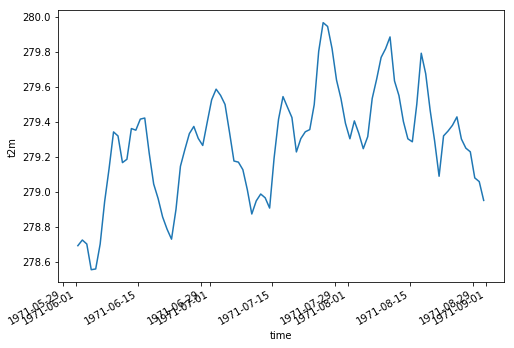

In [17]:
DS_date_range.t2m.mean(dim=('latitude', 'longitude')).plot()

- Pour sauvegarder nos résultats en csv:

In [18]:
DS_date_range.t2m.mean(dim=('time', 'longitude')).to_dataframe().to_csv('./DATA/CERA20C_T2m_2Dmean.csv')

- Quick plot with Xarray

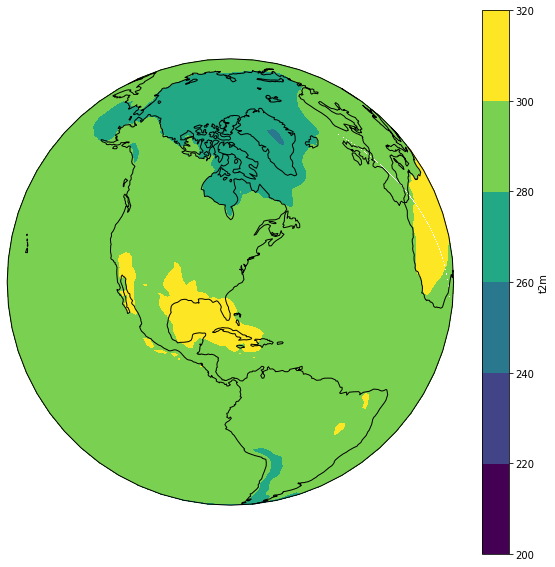

In [19]:
import cartopy.crs as ccrs
fig=plt.figure(figsize=(10,10), frameon=True) 

ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
Mean_array.t2m.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

<h4>Opérations arythmétiques:</h4>

Dans cette exemple, nous allons moyenne le Dataset DS_date_range et appliquer une simple opération arythmétique pour changer les unités. 

In [20]:
centigrade = DS_date_range.t2m.mean(dim='time') - 273.16
centigrade.values

array([[ -1.2229004,  -1.2229004,  -1.2229004, ...,  -1.2229004,
         -1.2229004,  -1.2229004],
       [ -1.3348389,  -1.3311157,  -1.3274231, ...,  -1.3488159,
         -1.3442383,  -1.3395386],
       [ -1.6027222,  -1.5914001,  -1.5804138, ...,  -1.6451721,
         -1.631012 ,  -1.6168518],
       ...,
       [-58.547928 , -58.5663   , -58.58455  , ..., -58.314026 ,
        -58.391983 , -58.46997  ],
       [-59.556473 , -59.577957 , -59.59955  , ..., -59.478424 ,
        -59.50441  , -59.53041  ],
       [-60.739105 , -60.739105 , -60.739105 , ..., -60.739105 ,
        -60.739105 , -60.739105 ]], dtype=float32)

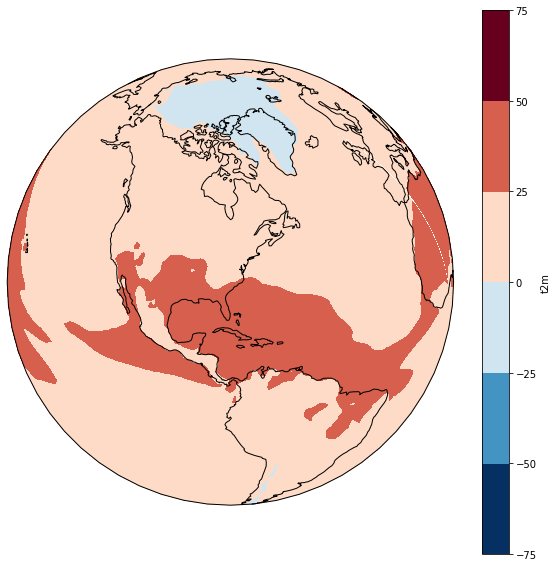

In [21]:
fig=plt.figure(figsize=(10,10), frameon=True)
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
centigrade.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

<h4>La méthode groupby():</h4>

Tout comme une manipulation de jeux de données sous Pandas, la méthode groupdby() avec Xarray est très utile pour regrouper nos Dataset par mois, saison, année ... puis y appliquer des fonctions.

In [40]:
TAS2

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 145, longitude: 288, time: 365)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Oct 25 14:29:40 2018: cdo daymean ./TAS/cera20c_member0...
    CDO:          Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/...

- Calcul des moyennes mensuelles:

In [41]:
DS_month = TAS2.groupby('time.month').mean('time')
DS_month

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288, month: 12)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m        (month, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>

On peut ainsi s'appuyer sur une méthode groupby() pour calculer des climatologies et des anomalies associées.

In [44]:
climatology = TAS2.groupby('time.month').mean('time')
anomalies = TAS2.groupby('time.month') - climatology

Autre exemple, on va calculer les anomalies standardisées mensuelles de la température

In [45]:
data_clim = TAS2.groupby('time.month').mean("time")
data_std = TAS2.groupby('time.month').std("time")
data_std

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288, month: 12)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m        (month, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>

In [49]:
# seaon mean:
DS_season = DS_new.groupby('time.season').mean('time')
DS_season

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288, season: 4)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    t2m        (season, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>
    siconc     (season, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>

In [50]:
# year mean:
DS_year = DS_new.groupby('time.year').mean('time')
DS_year

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288, year: 1)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * year       (year) int64 1971
Data variables:
    t2m        (year, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>
    siconc     (year, latitude, longitude) float32 dask.array<chunksize=(1, 145, 288), meta=np.ndarray>

- to select a specific season:

In [51]:
DS_winter = DS_season.sel(season='DJF')
DS_winter

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288)
Coordinates:
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
    season     <U3 'DJF'
Data variables:
    t2m        (latitude, longitude) float32 dask.array<chunksize=(145, 288), meta=np.ndarray>
    siconc     (latitude, longitude) float32 dask.array<chunksize=(145, 288), meta=np.ndarray>

In the example below, we will group the xarray.DataArray data by season, calculate the average, apply a simple arrhythmic operation and plot the resulting fields for each season. 

Text(0.5, 1.02, 'Seasonal Surface Air Temperature')

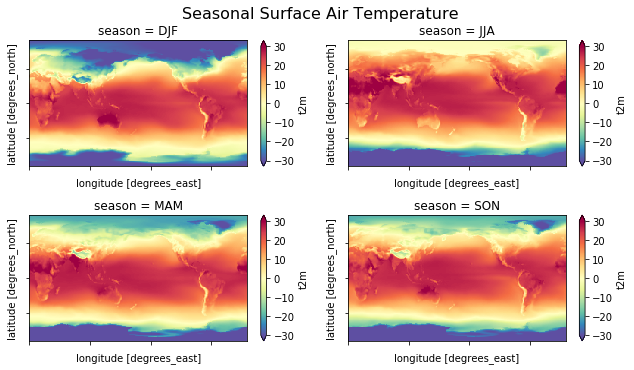

In [52]:
DS_Season = DS_new.t2m.groupby('time.season').mean('time')- 273.15
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,5))
j = 0
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        j += 1
        i = 0
    elif season =='SON':
        i = 1
        
    DS_Season.sel(season=season).plot.pcolormesh(
        ax=axes[i, j], vmin=-30, vmax=30, cmap='Spectral_r',
        add_colorbar=True, extend='both')

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
   
plt.tight_layout()
fig.suptitle('Seasonal Surface Air Temperature', fontsize=16, y=1.02)

Text(0.5, 1.02, 'Seasonal Sea Ice Concentration')

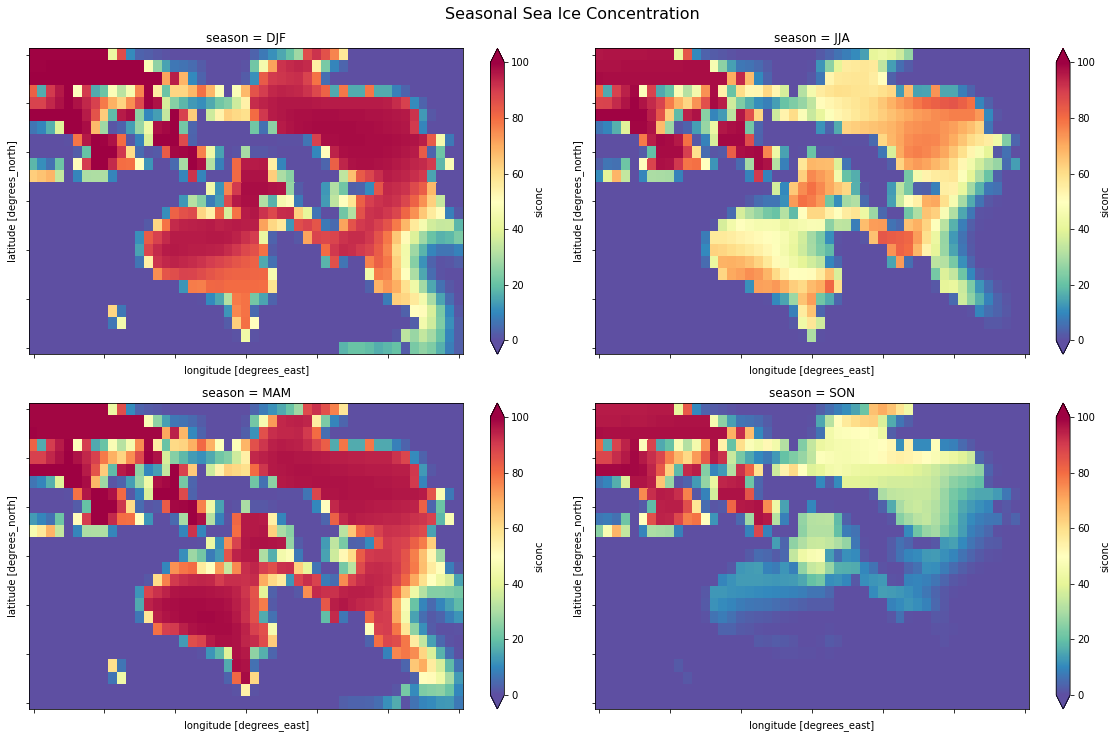

In [53]:

lat_bnd = [80, 50]
lon_bnd = [250, 310]
DS_Season = DS_new.sel(longitude=slice(*lon_bnd), latitude=slice(*lat_bnd),).siconc.groupby('time.season').mean('time') *100

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
j = 0
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        j += 1
        i = 0
    elif season =='SON':
        i = 1
        
    DS_Season.sel(season=season).plot.pcolormesh(
        ax=axes[i, j], vmin=0, vmax=100, cmap='Spectral_r',
        add_colorbar=True, extend='both')
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
   
plt.tight_layout()
fig.suptitle('Seasonal Sea Ice Concentration', fontsize=16, y=1.02)

To save our result into Netcdf: 

In [54]:
DS_season = DS_new.groupby('time.season').mean('time')
dataDIR = './DATA/CERA20C_season.nc'
DS_Season.to_netcdf(dataDIR)


##  4- Select grid points from Netcdf file using Xarray

In the previous section we applied the .sel () method to work on the time dimension. This method can be used on spatial dimensions to extract points or study areas from our netcdf file.

### Gridpoint:  to extract the closest grid point of a latitude / longitude: 

In [55]:
lati = 45.5
loni = 269.2
data  = DS_new.sel(longitude=loni  , latitude=lati  , method='nearest') 
data

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 365)
Coordinates:
    latitude   float32 45.0
    longitude  float32 268.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    t2m        (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    siconc     (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>

In [56]:
data['t2m'] = data['t2m'] - 273.15

In [57]:
data.t2m

<xarray.DataArray 't2m' (time: 365)>
dask.array<sub, shape=(365,), dtype=float32, chunksize=(31,)>
Coordinates:
    latitude   float32 45.0
    longitude  float32 268.75
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00

We can convert our selection into a DataFrame and then use Pandas to analyse our results.

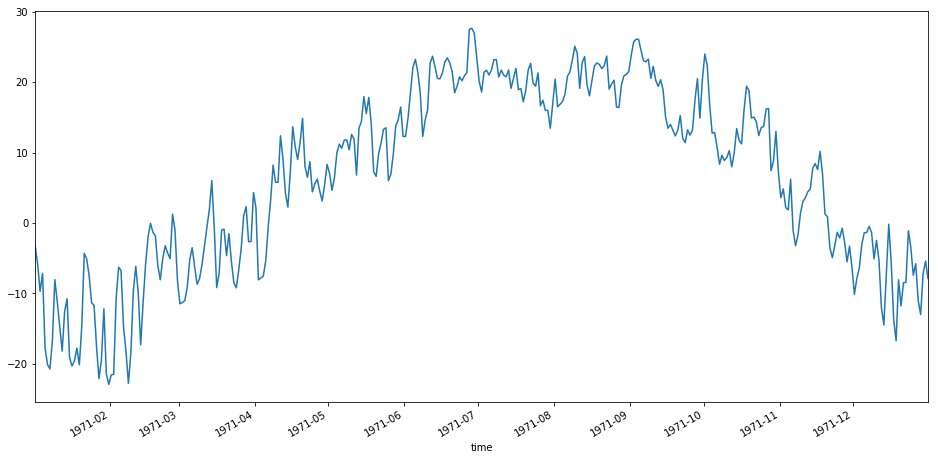

In [58]:
df = data.t2m.to_dataframe()
fig = plt.figure(figsize=(16,8))
df['t2m'].plot()

### Gridpoints:  to extract a list of points

In [59]:
lats =  [20.0,50.0,90.0]
lons =  [60.0,80.0,120.0]

data  = DS_new.sel(longitude=lons  , latitude=lats  , method='nearest')
data['t2m'] = data['t2m']-273.15
data

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 3, longitude: 3, time: 365)
Coordinates:
  * latitude   (latitude) float32 20.0 50.0 90.0
  * longitude  (longitude) float32 60.0 80.0 120.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 3, 3), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(31, 3, 3), meta=np.ndarray>

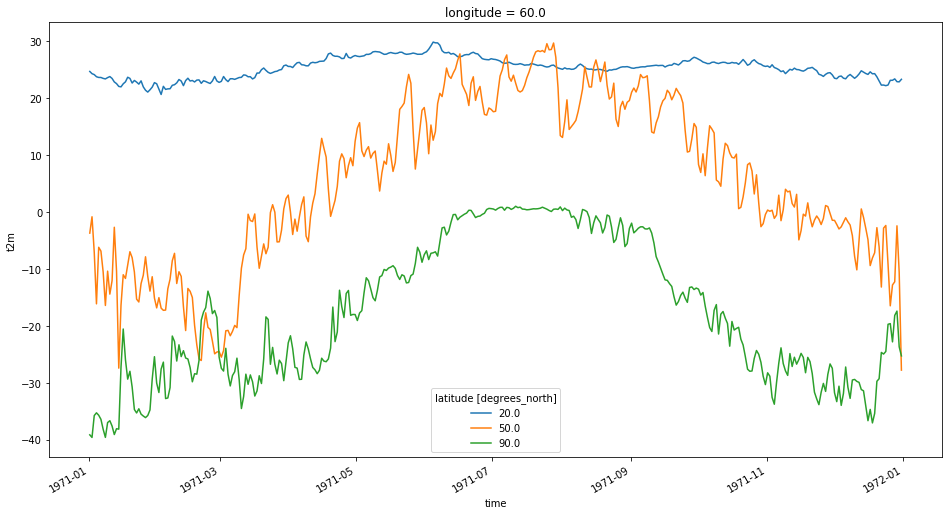

In [60]:
fig = plt.figure(figsize=(16,8))
data.t2m.sel(longitude=60.0, latitude=[20.0,50.0,90.0]).plot.line(x='time')

### To extract an area or subdomain delimited by latitude and longitude values: .slicing() 

In [61]:
lat_bnd = [80, 50]
lon_bnd = [250, 310]
area = DS_new.sel(longitude=slice(*lon_bnd), latitude=slice(*lat_bnd),)
area

<xarray.Dataset>
Dimensions:    (bnds: 2, latitude: 25, longitude: 49, time: 365)
Coordinates:
  * latitude   (latitude) float32 80.0 78.75 77.5 76.25 ... 52.5 51.25 50.0
  * longitude  (longitude) float32 250.0 251.25 252.5 ... 307.5 308.75 310.0
  * time       (time) datetime64[ns] 1971-01-01T10:30:00 ... 1971-12-31T10:30:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(31, 2), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 25, 49), meta=np.ndarray>
    siconc     (time, latitude, longitude) float32 dask.array<chunksize=(31, 25, 49), meta=np.ndarray>

In [62]:
area.longitude.values

array([250.  , 251.25, 252.5 , 253.75, 255.  , 256.25, 257.5 , 258.75,
       260.  , 261.25, 262.5 , 263.75, 265.  , 266.25, 267.5 , 268.75,
       270.  , 271.25, 272.5 , 273.75, 275.  , 276.25, 277.5 , 278.75,
       280.  , 281.25, 282.5 , 283.75, 285.  , 286.25, 287.5 , 288.75,
       290.  , 291.25, 292.5 , 293.75, 295.  , 296.25, 297.5 , 298.75,
       300.  , 301.25, 302.5 , 303.75, 305.  , 306.25, 307.5 , 308.75,
       310.  ], dtype=float32)

To visualize our area:: 

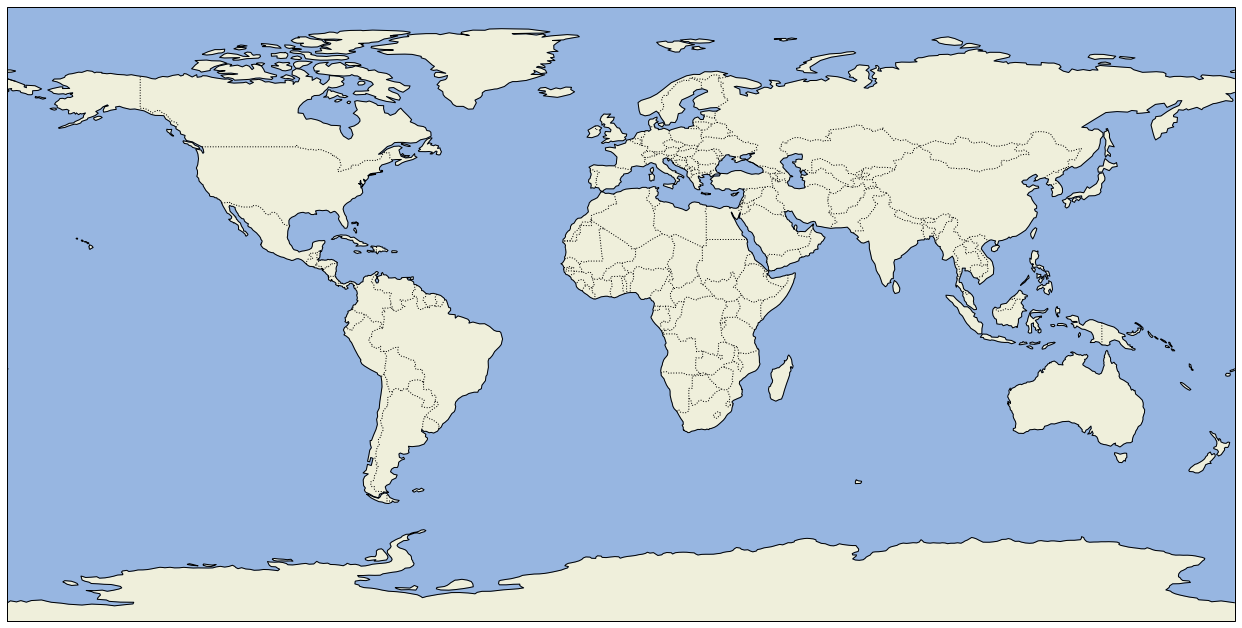

In [63]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
def make_figure():
    fig = plt.figure(figsize=(22, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

make_figure();

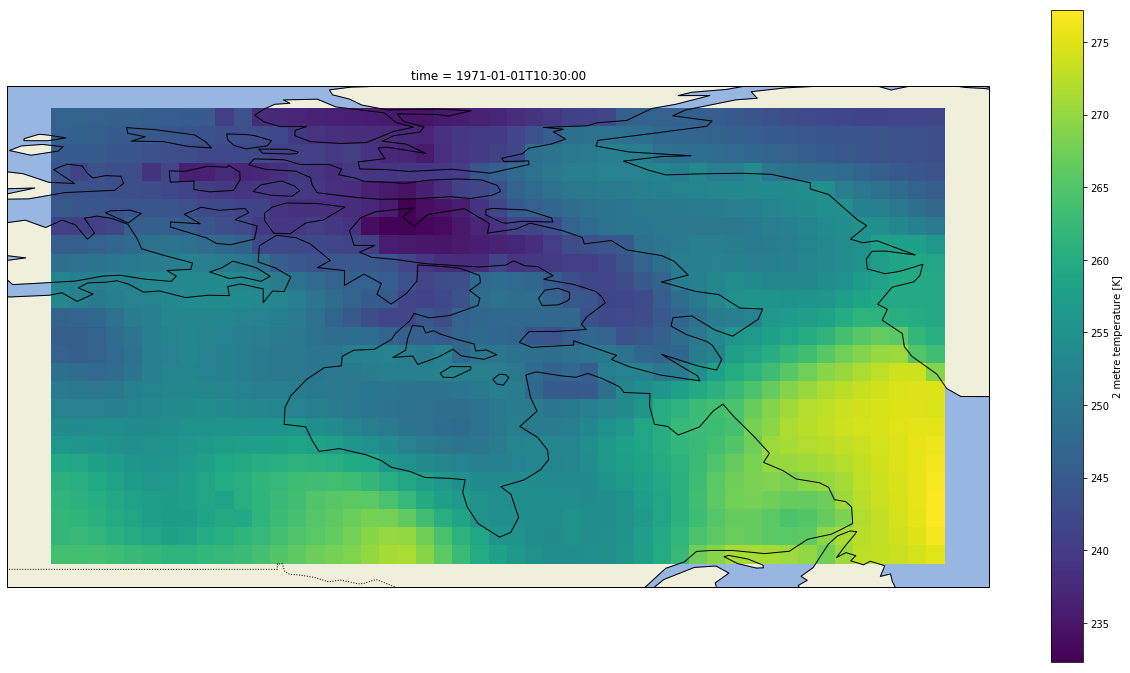

In [64]:
_, ax = make_figure()
# plot the temperature field
area.t2m[0].plot()

### To mask an area delimited by a Shapefile:

To do this, we need to import two more librairies: 
- Geopandas: conda install -c conda-forge geopandas
- osgeo: conda install -c conda-forge gdal

The next function will open a shapefile, read the polygons and make a mask from each grid points of our Netcdf inside the polygons. 

In [65]:
from osgeo import ogr
import geopandas as gpd
import numpy as np
def get_mask(lons2d, lats2d, shp_path="", polygon_name=None):
    """
    Assumes that the shape file contains polygons in lat lon coordinates
    :param lons2d:
    :param lats2d:
    :param shp_path:
    :rtype : np.ndarray
    The mask is 1 for the points inside of the polygons
    """
    ds = ogr.Open(shp_path)
    """
    :type : ogr.DataSource
    """

    xx = lons2d.copy()
    yy = lats2d

    # set longitudes to be from -180 to 180
    xx[xx > 180] -= 360

    mask = np.zeros(lons2d.shape, dtype=int)
    nx, ny = mask.shape

    pt = ogr.Geometry(ogr.wkbPoint)

    for i in range(ds.GetLayerCount()):
        layer = ds.GetLayer(i)
        """
        :type : ogr.Layer
        """

        for j in range(layer.GetFeatureCount()):
            feat = layer.GetFeature(j)
            """
            :type : ogr.Feature
            """

            # Select polygons by the name property
            if polygon_name is not None:
                if not feat.GetFieldAsString("NAME") == polygon_name:
                    continue

            g = feat.GetGeometryRef()
            """
            :type : ogr.Geometry
            """

            assert isinstance(g, ogr.Geometry)

            for pi in range(nx):
                for pj in range(ny):
                    pt.SetPoint_2D(0, float(xx[pi, pj]), float(yy[pi, pj]))

                    mask[pi, pj] += int(g.Contains(pt))

    return mask


We first read the Netcdf file and store informations in a Xarray.dataset. 


In [66]:
ds = xr.open_dataset('./DATA/CERA20C/cera20c_member0_TAS_197101_day.nc')

We then need to extract latitudes and longitudes values and compute a 2D matrix. 

In [67]:
Imp_Lats =  ds['latitude'].values
Imp_Lons =  ds['longitude'].values
lon2d, lat2d = np.meshgrid(Imp_Lons, Imp_Lats)

In [68]:
ds_mean = ds.mean('time') - 273.15
ds_mean

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
Data variables:
    t2m        (latitude, longitude) float32 -34.067184 ... -25.249802

We open the shape file with Geopandas library.

In [69]:
shapes = gpd.read_file("./DATA/Shapefiles/Countries_Final-polygon.shp")
list(shapes.columns.values)

['FIPS',
 'ISO2',
 'ISO3',
 'UN',
 'NAME',
 'AREA',
 'POP2005',
 'REGION',
 'SUBREGION',
 'LON',
 'LAT',
 'layer',
 'path',
 'geometry']

In [70]:
shapes.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,layer,path,geometry
0,NT,AN,ANT,530,Bonaire,80,186392,19,29,-68.870,12.123,Single parts,C:/Users/Aspire/Desktop/ZIKA analysis with new...,POLYGON ((-68.19528200000002 12.22110899999996...
1,NT,AN,ANT,530,Curacao,80,186392,19,29,-68.870,12.123,Single parts,C:/Users/Aspire/Desktop/ZIKA analysis with new...,POLYGON ((-68.96556099999998 12.19888900000001...
2,NT,AN,ANT,530,Netherlands Antilles,80,186392,19,29,-68.870,12.123,Single parts,C:/Users/Aspire/Desktop/ZIKA analysis with new...,"POLYGON ((-62.96111299999995 17.4608310000001,..."
3,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,Studied_countries,C:\Users\Aspire\Desktop\ZIKA analysis with new...,"(POLYGON ((-61.686668 17.02444100000014, -61.7..."
4,AR,AR,ARG,32,Argentina,273669,38747148,19,5,-65.167,-35.377,Studied_countries,C:\Users\Aspire\Desktop\ZIKA analysis with new...,(POLYGON ((-68.60861199999994 -54.891395999999...


In [71]:
from tabulate import tabulate
print(tabulate(shapes.head(), headers='keys', tablefmt='pipe'))

|    | FIPS   | ISO2   | ISO3   |   UN | NAME                 |   AREA |   POP2005 |   REGION |   SUBREGION |     LON |     LAT | layer             | path                                                                                                                                         | geometry                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

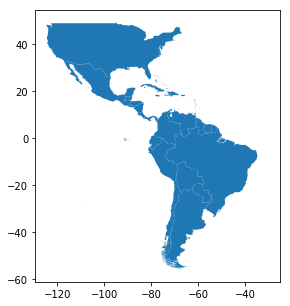

In [72]:
shapes.loc[27, 'geometry']
shapes.plot()

We want in our study to extract information inside Mexico shapefile.

In [73]:
mask=get_mask(lon2d,lat2d,shp_path="./DATA/Shapefiles/Countries_Final-polygon.shp", polygon_name='Mexico') 
np.max(mask)

1

We will convert our mask into numpy 2D array. We'll be later able to apply this matrix to mask our Netcdf file. 

In [74]:
np.save('DATA/Mexico.npy',mask) # saving our mask in numpy.array

We will mask our area using .where() method. 

In [75]:
ds_mask = ds_mean.where(mask == 1) 
ds_mask.to_netcdf('DATA/Mexico.nc')  # we want to save our shapefile mask in Netcdf format

In [76]:
ds_mask

<xarray.Dataset>
Dimensions:    (latitude: 145, longitude: 288)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * latitude   (latitude) float32 90.0 88.75 87.5 86.25 ... -87.5 -88.75 -90.0
Data variables:
    t2m        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan

In [77]:
np.max(ds_mask.t2m)

<xarray.DataArray 't2m' ()>
array(24.01031494)

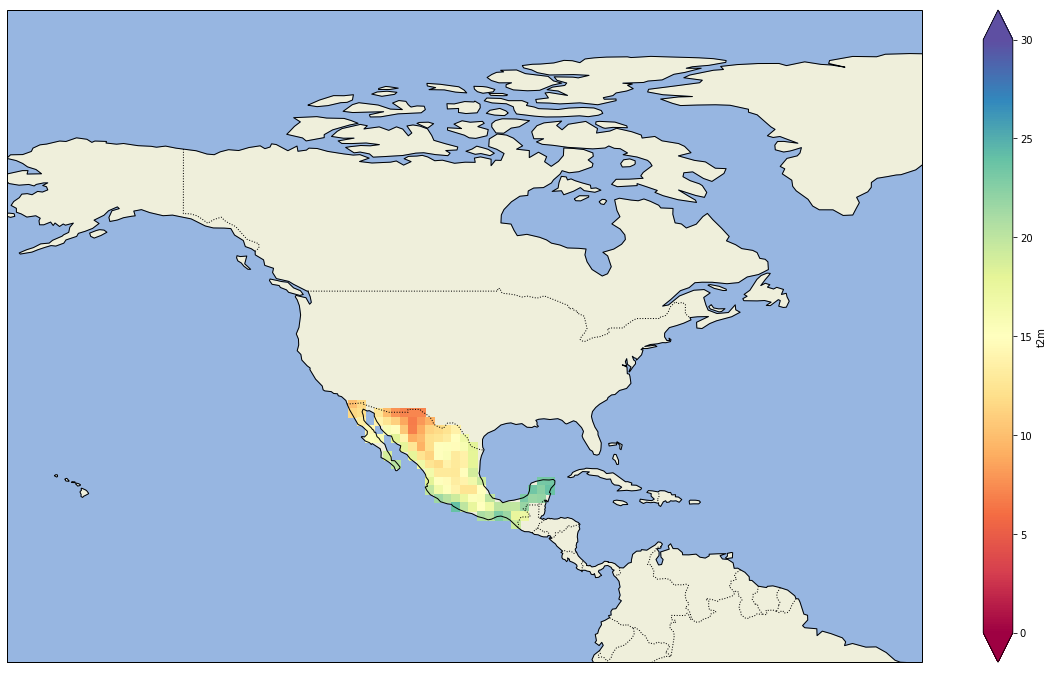

In [83]:
_, ax = make_figure()
# plot the temperature field
lat_bnd = [90, 0]
lon_bnd = [200, 320]
ds_mask.t2m.sel(longitude=slice(*lon_bnd), latitude=slice(*lat_bnd),).plot.pcolormesh(vmin=0, vmax=30, cmap='Spectral',add_colorbar=True, extend='both')

##  5- Last example using Xarray: 

In this section, We will calculate the seasonal accumulation of the precipitation, extract a region, plot the domain and record our result in Netcdf:

In [84]:
# Let's open cera20c_enda_ep_PR_*.nc netcdf files 
multi_dataDIR = './DATA/CERA20C/cera20c_enda_ep_PR_*.nc'
array = xr.open_mfdataset(multi_dataDIR)
array.tp

<xarray.DataArray 'tp' (time: 365, latitude: 181, longitude: 360)>
dask.array<concatenate, shape=(365, 181, 360), dtype=float32, chunksize=(31, 181, 360)>
Coordinates:
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * time       (time) datetime64[ns] 1971-01-02T18:00:00 ... 1972-01-01T18:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

All Netcdf files are stored in DataArray container, we can now group our Datasets by season, apply a simple sum() method over time and then change units from meters to mm.

In [85]:
array_season = array.groupby('time.season').sum('time')*1000
array_season

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, season: 4)
Coordinates:
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    tp         (season, latitude, longitude) float32 dask.array<chunksize=(1, 181, 360), meta=np.ndarray>

We want to extract a specific domain delimited: 
    - latitude boundaries: 50N to 70N
    - longitude boudaries: 250E to 310E
    
We finally want to extract winter season. 

In [93]:
lat_bnd = [70, 50]
lon_bnd = [250, 310]
subset_season_DJF = array_season.sel(season = 'DJF', longitude=slice(*lon_bnd), latitude=slice(*lat_bnd),)
subset_season_DJF

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 61)
Coordinates:
  * latitude   (latitude) float32 70.0 69.0 68.0 67.0 ... 53.0 52.0 51.0 50.0
  * longitude  (longitude) float32 250.0 251.0 252.0 253.0 ... 308.0 309.0 310.0
    season     <U3 'DJF'
Data variables:
    tp         (latitude, longitude) float32 dask.array<chunksize=(21, 61), meta=np.ndarray>

Let's save the Dataset to Netcdf. 

In [94]:
dataDIR = './DATA/subset_season.nc'
subset_season_DJF.to_netcdf(dataDIR)

We can call our make_figure() function to quick plot our Dataset. 

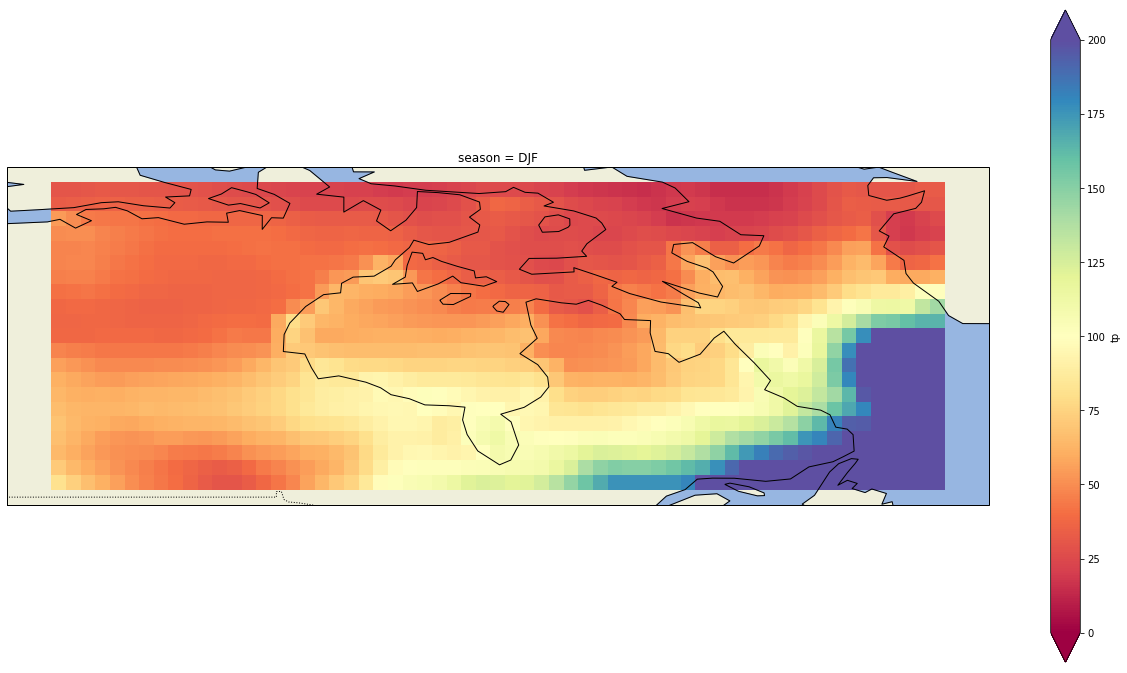

In [95]:
_, ax = make_figure()
# plot the temperature field
subset_season_DJF.tp.plot.pcolormesh(vmin=0, vmax=200, cmap='Spectral',add_colorbar=True, extend='both')